<a href="https://colab.research.google.com/github/dannycusack/repo_test/blob/main/DS110_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df = pd.read_csv('housing.csv')

In [5]:
import numpy as np
import pandas as pd
from pandas import read_csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


Central Question:

How do various factors such as crime rate, number of rooms, proximity to employment centers, age of the house, property tax rate, and accessibility to highways impact housing prices in Boston, and can we develop an accurate predictive model to estimate property values based on these factors?


Data Preparation:

In [6]:
data.drop(['ZN', 'INDUS'], axis=1, inplace=True)

In [7]:
data['CRIM_scaled'] = (data['CRIM'] - data['CRIM'].min()) / (data['CRIM'].max() - data['CRIM'].min())
data['TAX_scaled'] = (data['TAX'] - data['TAX'].min()) / (data['TAX'].max() - data['TAX'].min())

data.drop(['CRIM', 'TAX'], axis=1, inplace=True)

In [8]:
print(data.describe())

             CHAS         NOX          RM         AGE         DIS         RAD  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.069170    0.554695    6.284634   68.574901    3.795043    9.549407   
std      0.253994    0.115878    0.702617   28.148861    2.105710    8.707259   
min      0.000000    0.385000    3.561000    2.900000    1.129600    1.000000   
25%      0.000000    0.449000    5.885500   45.025000    2.100175    4.000000   
50%      0.000000    0.538000    6.208500   77.500000    3.207450    5.000000   
75%      0.000000    0.624000    6.623500   94.075000    5.188425   24.000000   
max      1.000000    0.871000    8.780000  100.000000   12.126500   24.000000   

          PTRATIO           B       LSTAT        MEDV  CRIM_scaled  TAX_scaled  
count  506.000000  506.000000  506.000000  506.000000   506.000000  506.000000  
mean    18.455534  356.674032   12.653063   22.532806     0.040544    0.422208  
std      2.164946   91.2948

Exploratory Statistics

In [9]:
#correlation matrix
correlation_matrix = data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

correlation_with_medv = correlation_matrix['MEDV'].drop('MEDV')

sorted_correlation_with_medv = correlation_with_medv.sort_values(ascending=False)

print("\nCorrelation with MEDV:")
print(sorted_correlation_with_medv)

positively_correlated_factors = sorted_correlation_with_medv[sorted_correlation_with_medv > 0].index.tolist()
negatively_correlated_factors = sorted_correlation_with_medv[sorted_correlation_with_medv < 0].index.tolist()

print("\nFactors positively correlated with MEDV:")
print(positively_correlated_factors)
print("\nFactors negatively correlated with MEDV:")
print(negatively_correlated_factors)

Correlation Matrix:
                 CHAS       NOX        RM       AGE       DIS       RAD  \
CHAS         1.000000  0.091203  0.091251  0.086518 -0.099176 -0.007368   
NOX          0.091203  1.000000 -0.302188  0.731470 -0.769230  0.611441   
RM           0.091251 -0.302188  1.000000 -0.240265  0.205246 -0.209847   
AGE          0.086518  0.731470 -0.240265  1.000000 -0.747881  0.456022   
DIS         -0.099176 -0.769230  0.205246 -0.747881  1.000000 -0.494588   
RAD         -0.007368  0.611441 -0.209847  0.456022 -0.494588  1.000000   
PTRATIO     -0.121515  0.188933 -0.355501  0.261515 -0.232471  0.464741   
B            0.048788 -0.380051  0.128069 -0.273534  0.291512 -0.444413   
LSTAT       -0.053929  0.590879 -0.613808  0.602339 -0.496996  0.488676   
MEDV         0.175260 -0.427321  0.695360 -0.376955  0.249929 -0.381626   
CRIM_scaled -0.055892  0.420972 -0.219247  0.352734 -0.379670  0.625505   
TAX_scaled  -0.035587  0.668023 -0.292048  0.506456 -0.534432  0.910228   

    

In [10]:
from scipy.stats import ttest_ind
group_bounded = data[data['CHAS'] == 1]['MEDV']
group_not_bounded = data[data['CHAS'] == 0]['MEDV']

# t-test
t_statistic, p_value = ttest_ind(group_bounded, group_not_bounded)
print("Independent Samples T-Test Results:")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
  print("Statistically significant.")
else:
  print("Not statistically significant.")

Independent Samples T-Test Results:
T-statistic: 4.00
P-value: 0.0001
Statistically significant.


Machine Learning

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

Mean Squared Error: 25.576770173721183
R-squared Score: 0.6512280006364185

Coefficients:
CHAS: 2.89
NOX: -17.30
RM: 4.52
AGE: -0.01
DIS: -1.28
RAD: 0.24
PTRATIO: -1.00
B: 0.01
LSTAT: -0.50
CRIM_scaled: -9.62
TAX_scaled: -4.11


Ex. on average, for every additional room in a house, the property value is estimated to increase by $4,520

Ex. on average, for every unit increase for crime rate, the property value is estimated to decrease by $9,620.

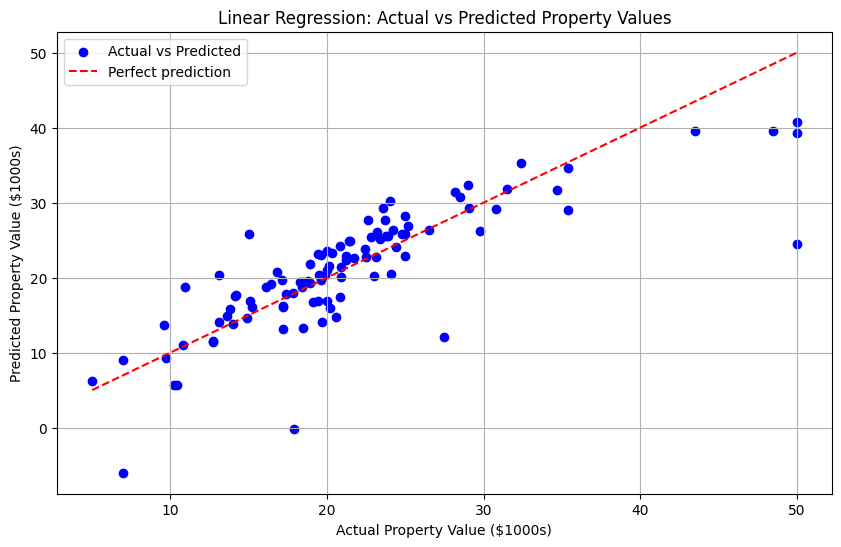

In [12]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect prediction')
plt.xlabel('Actual Property Value ($1000s)')
plt.ylabel('Predicted Property Value ($1000s)')
plt.title('Linear Regression: Actual vs Predicted Property Values')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from sklearn.ensemble import RandomForestRegressor
X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 7.65987209803922
R-squared Score: 0.8955478393731149


In [15]:
from sklearn.tree import DecisionTreeRegressor

max_depth_values = [None, 3, 5, 7, 9]
mse_values = []
for max_depth in max_depth_values:
    decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

for i, max_depth in enumerate(max_depth_values):
    print(f"Max Depth: {max_depth}, Mean Squared Error: {mse_values[i]}")

Max Depth: None, Mean Squared Error: 11.084313725490198
Max Depth: 3, Mean Squared Error: 16.766567150642494
Max Depth: 5, Mean Squared Error: 20.217794263175044
Max Depth: 7, Mean Squared Error: 9.51487416159918
Max Depth: 9, Mean Squared Error: 8.692890639509239


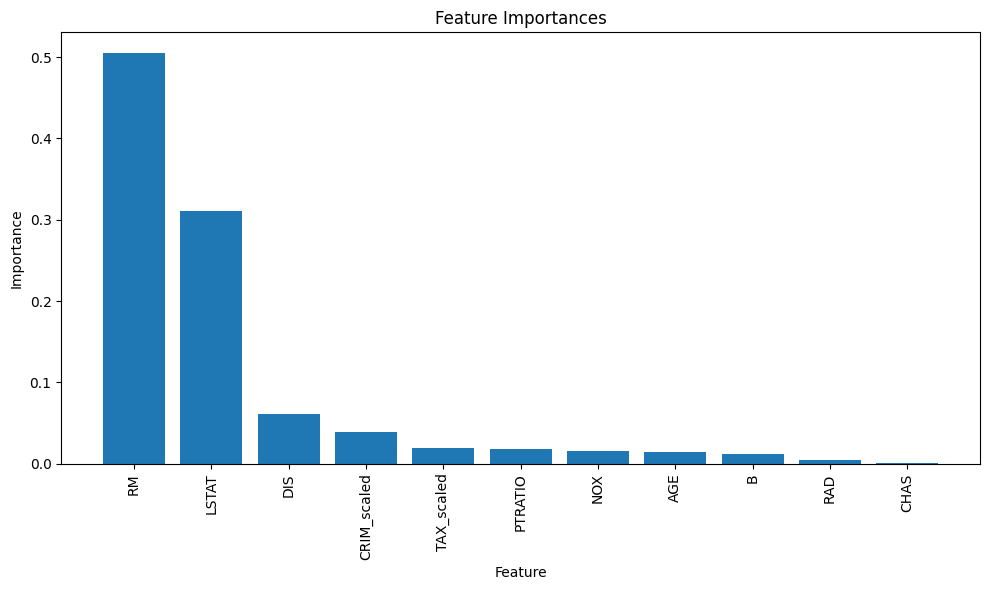

In [26]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Visualizations

<Axes: >

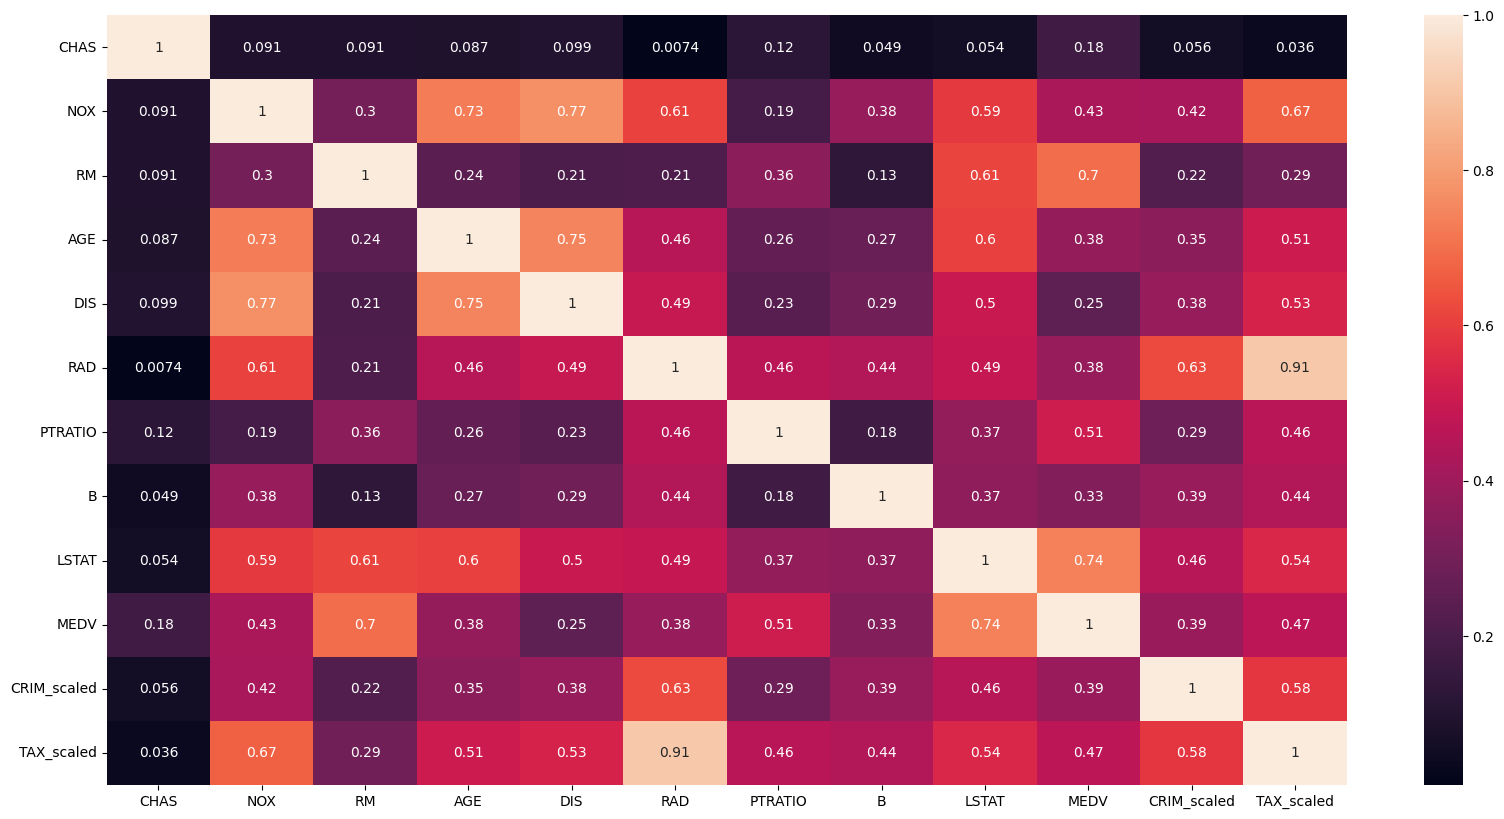

In [14]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

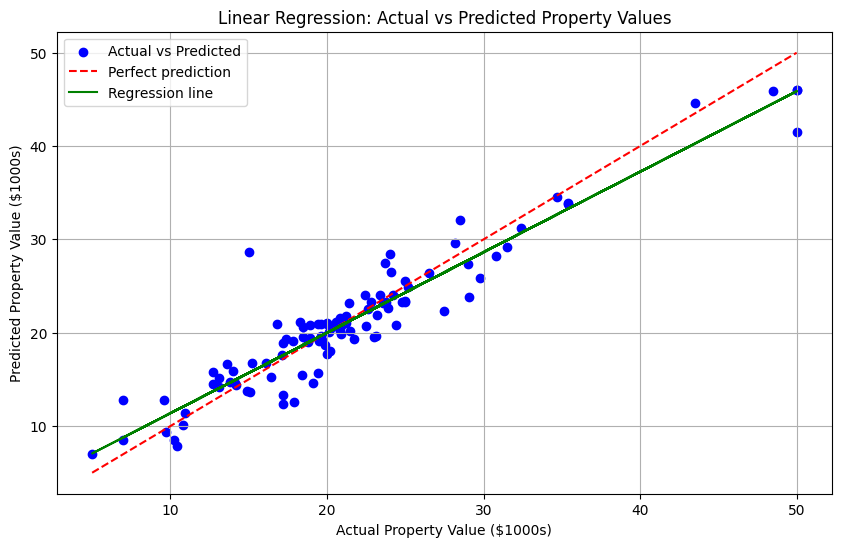

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual Property Value ($1000s)')
plt.ylabel('Predicted Property Value ($1000s)')
plt.title('Linear Regression: Actual vs Predicted Property Values')

# Add regression line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect prediction')

m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='green', label='Regression line')

plt.legend()
plt.grid(True)
plt.show()

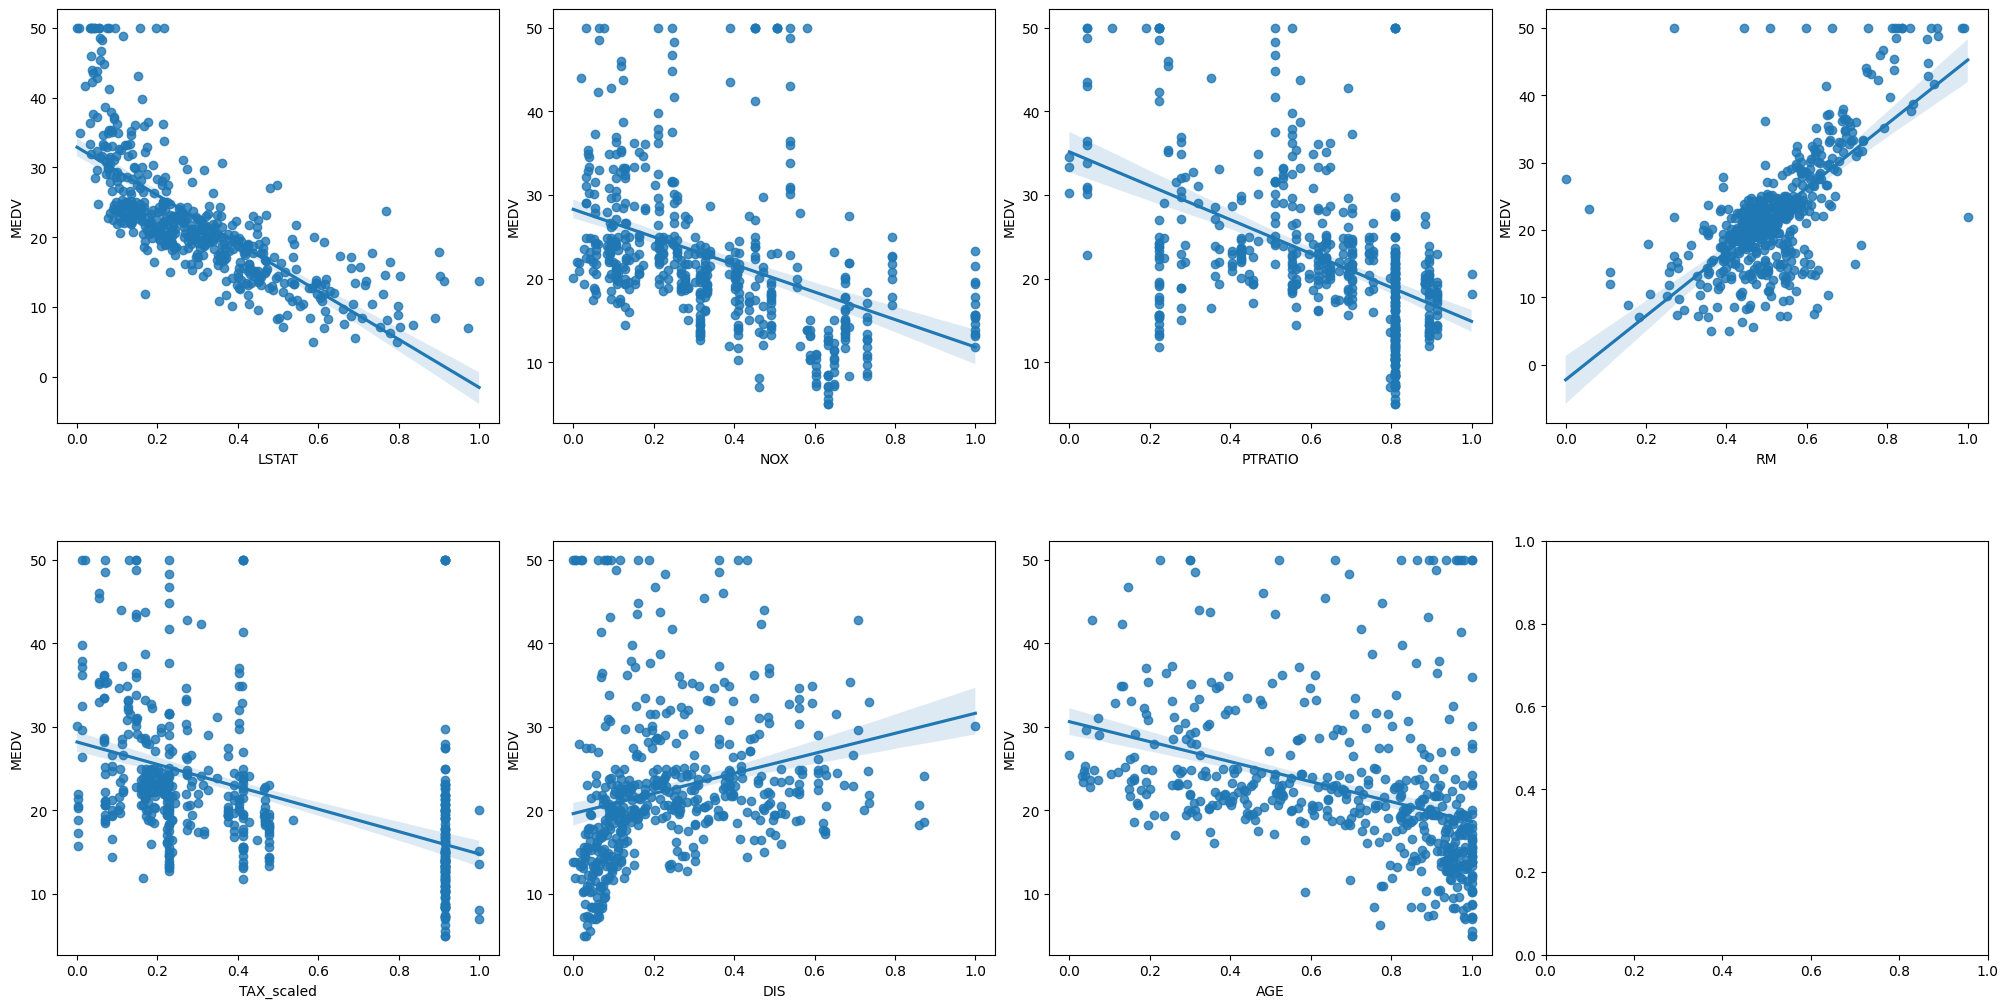

In [17]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'NOX', 'PTRATIO', 'RM', 'TAX_scaled', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

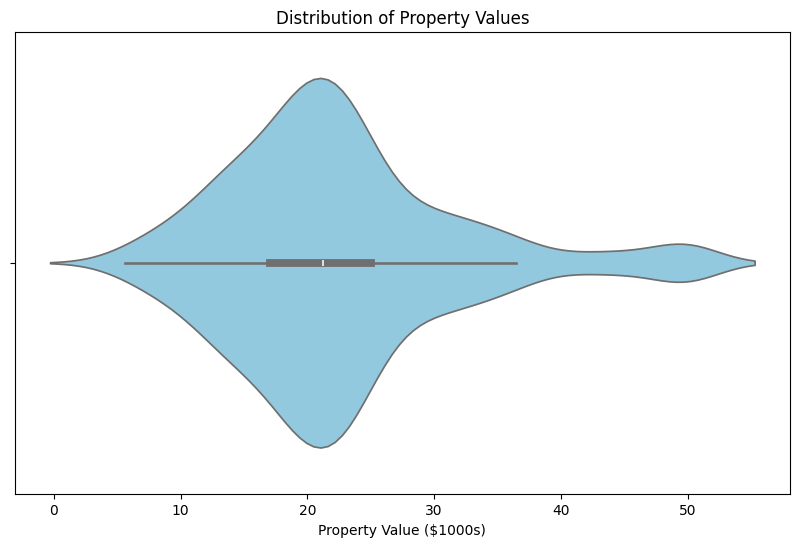

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=y, color='skyblue')
plt.xlabel('Property Value ($1000s)')
plt.title('Distribution of Property Values')
plt.show()

The violin plot displays the distribution of property values, including the median (thick line), interquartile range (width of the violin), and the kernel density estimation of the data (shape of the violin).

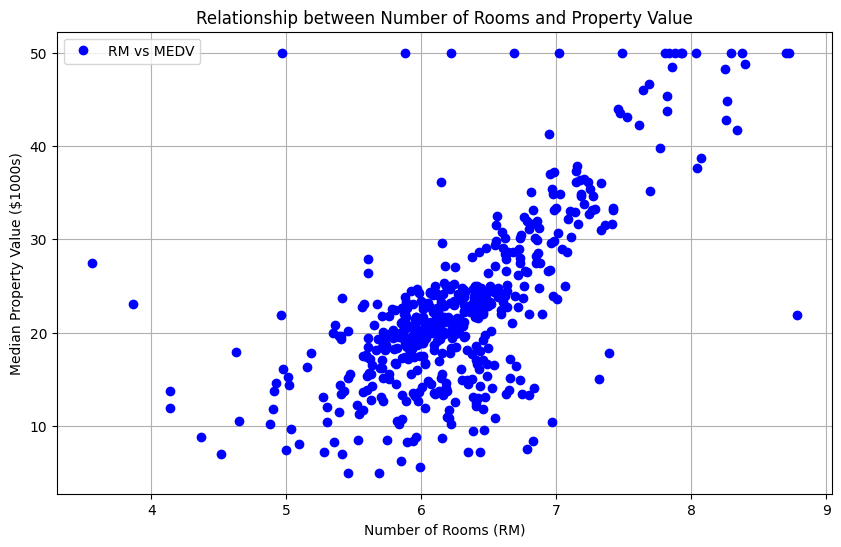

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(data['RM'], data['MEDV'], marker='o', linestyle='', color='blue', label='RM vs MEDV')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Median Property Value ($1000s)')
plt.title('Relationship between Number of Rooms and Property Value')
plt.legend()
plt.grid(True)
plt.show()

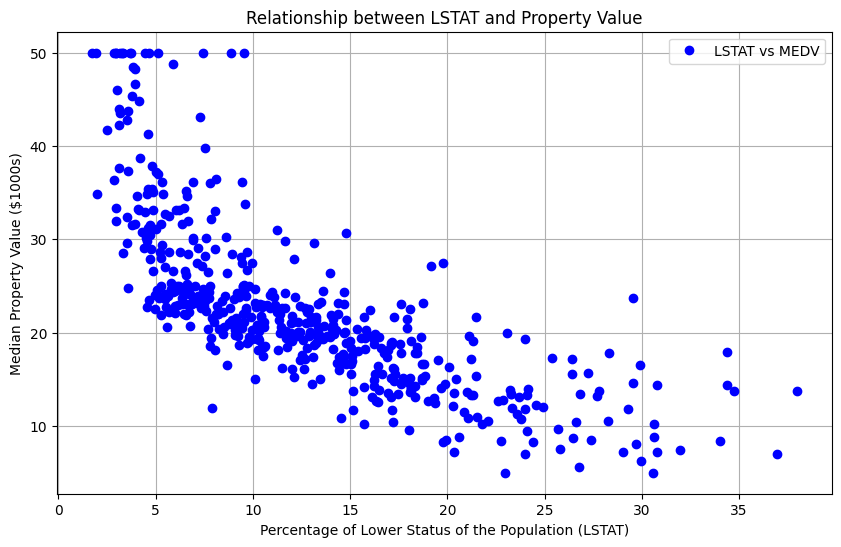

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(data['LSTAT'], data['MEDV'], marker='o', linestyle='', color='blue', label='LSTAT vs MEDV')
plt.xlabel('Percentage of Lower Status of the Population (LSTAT)')
plt.ylabel('Median Property Value ($1000s)')
plt.title('Relationship between LSTAT and Property Value')
plt.legend()
plt.grid(True)
plt.show()

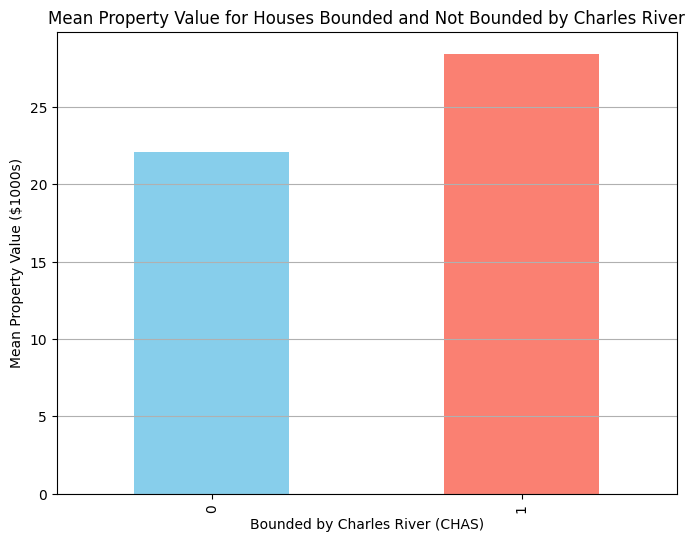

In [21]:
mean_property_value = data.groupby('CHAS')['MEDV'].mean()
#bar plot
plt.figure(figsize=(8, 6))
mean_property_value.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Bounded by Charles River (CHAS)')
plt.ylabel('Mean Property Value ($1000s)')
plt.title('Mean Property Value for Houses Bounded and Not Bounded by Charles River')
plt.grid(axis='y')
plt.show()

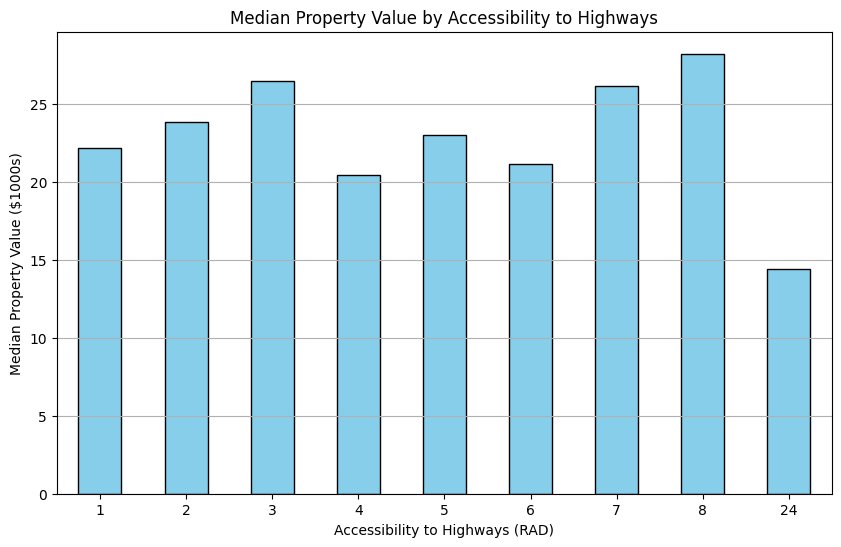

In [22]:
median_medv_by_rad = data.groupby('RAD')['MEDV'].median()

plt.figure(figsize=(10, 6))
median_medv_by_rad.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Accessibility to Highways (RAD)')
plt.ylabel('Median Property Value ($1000s)')
plt.title('Median Property Value by Accessibility to Highways')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

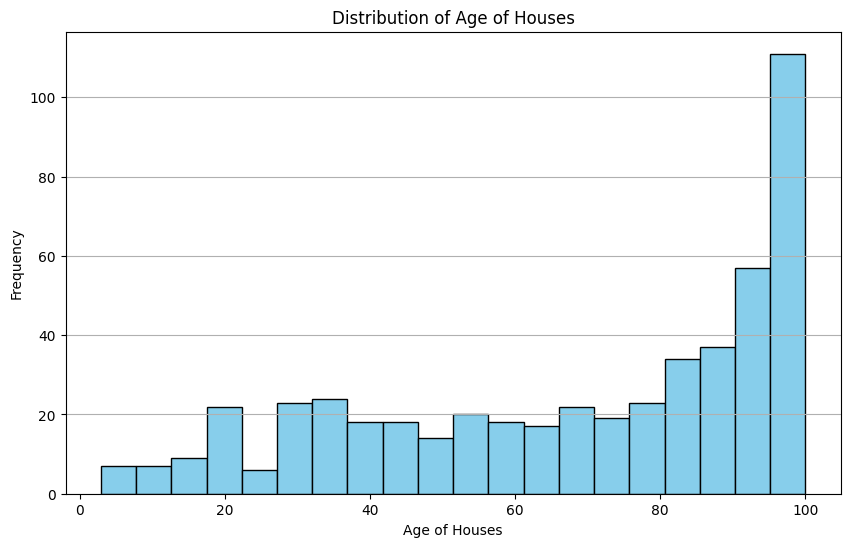

In [23]:
#histogram of the age of houses
plt.figure(figsize=(10, 6))
plt.hist(data['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age of Houses')
plt.ylabel('Frequency')
plt.title('Distribution of Age of Houses')
plt.grid(axis='y')
plt.show()